In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/home/aditya/Desktop/codsoft/task1/fraudTest.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
def segment_by_amount(row):
    if row['amt'] > 100:
        return 'High Value'
    elif row['amt'] > 50:
        return 'Medium Value'
    else:
        return 'Low Value'

df['AmountSegment'] = df.apply(segment_by_amount, axis=1)

print(df.head())

   Unnamed: 0 trans_date_trans_time        cc_num   
0           0   2020-06-21 12:14:25  2.291164e+15  \
1           1   2020-06-21 12:14:33  3.573030e+15   
2           2   2020-06-21 12:14:53  3.598215e+15   
3           3   2020-06-21 12:15:15  3.591920e+15   
4           4   2020-06-21 12:15:17  3.526826e+15   

                               merchant        category    amt   first   
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff  \
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long city_pop   
0   Elliott      M            351 Darlene Green  ...  -80.9355   333497  \
1  Williams      F             3638 Marsh Union  ... -110.4360      302   
2     Lopez

/tmp/ipykernel_11851/3609210394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AmountSegment', data=df, palette='viridis')


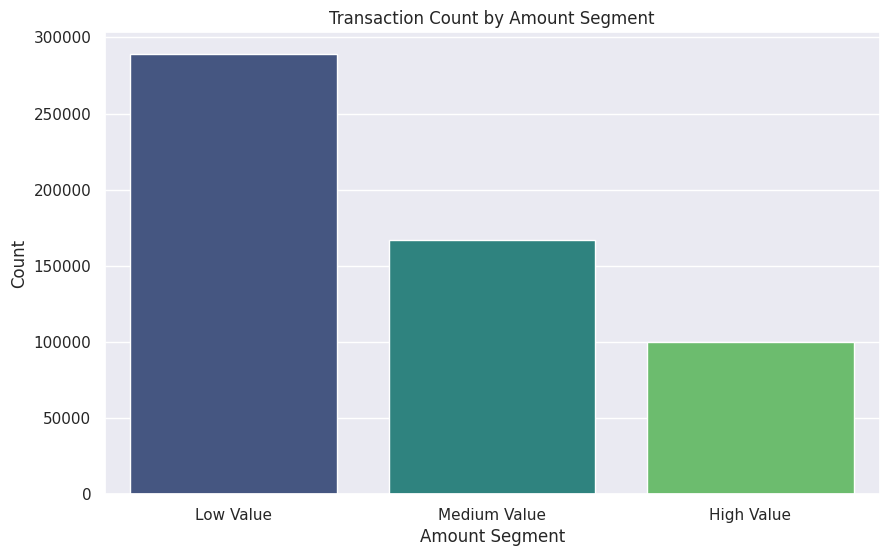

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AmountSegment', data=df, palette='viridis')
plt.title('Transaction Count by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.show()

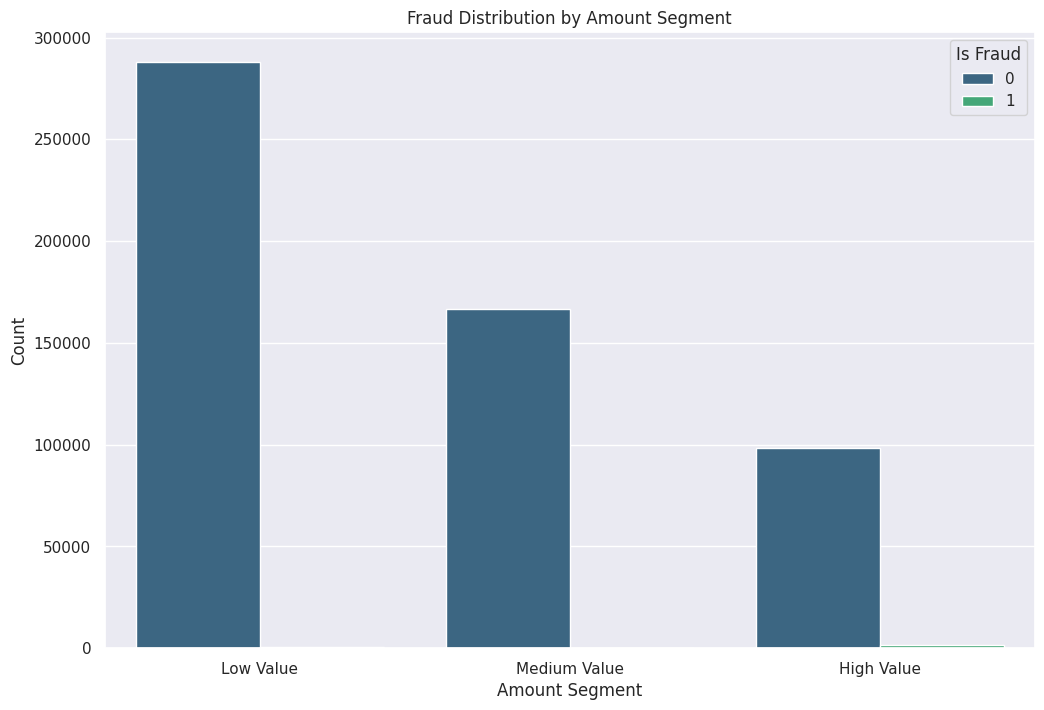

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(x='AmountSegment', hue='is_fraud', data=df, palette='viridis')
plt.title('Fraud Distribution by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()


/tmp/ipykernel_11851/4094396673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, palette='viridis', order=df['category'].value_counts().index)


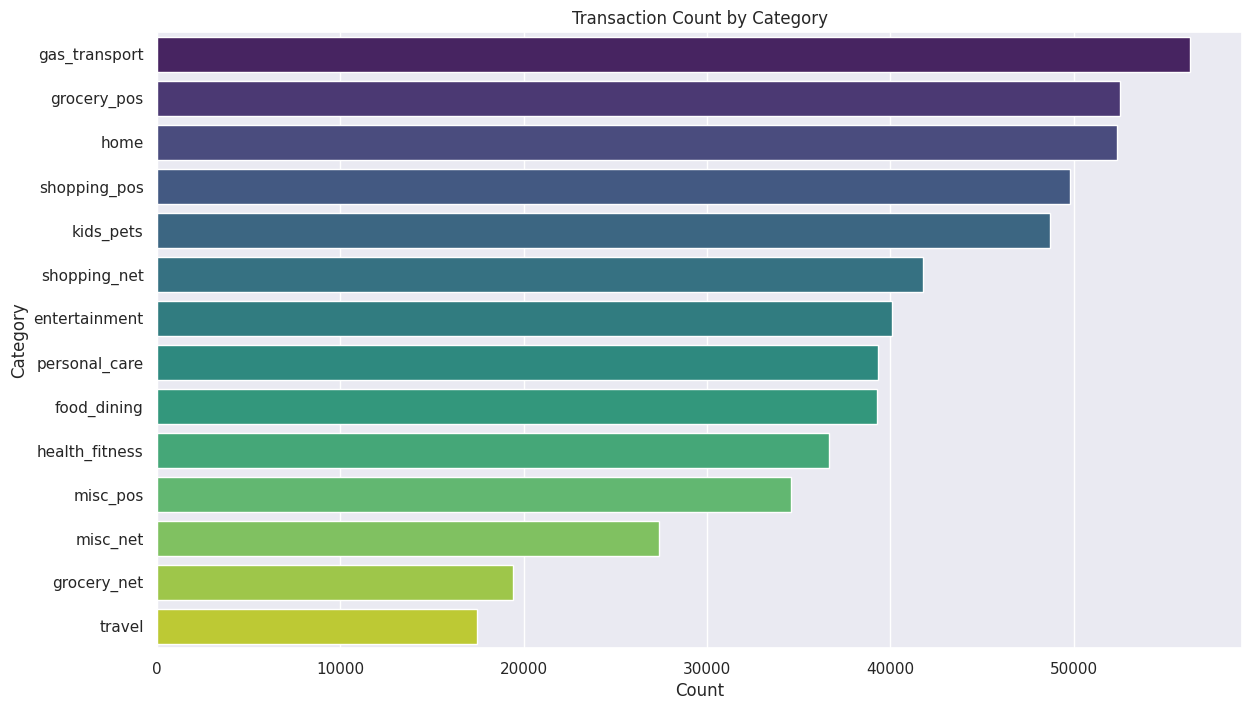

In [7]:
plt.figure(figsize=(14, 8))
sns.countplot(y='category', data=df, palette='viridis', order=df['category'].value_counts().index)
plt.title('Transaction Count by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/home/aditya/Desktop/codsoft/task1/fraudTest.csv')

df = df.head(2000)

print(df.head())
print(df.info())
print(df.describe())

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num'])

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   Unnamed: 0 trans_date_trans_time        cc_num   
0           0   2020-06-21 12:14:25  2.291164e+15  \
1           1   2020-06-21 12:14:33  3.573030e+15   
2           2   2020-06-21 12:14:53  3.598215e+15   
3           3   2020-06-21 12:15:15  3.591920e+15   
4           4   2020-06-21 12:15:17  3.526826e+15   

                               merchant        category    amt   first   
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff  \
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long   
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355  \
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

# Evaluate models using cross-validation
models = [log_reg, rf_clf, gb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} ROC-AUC: {scores.mean():.2f} ± {scores.std():.2f}")

# Evaluate models on test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


Logistic Regression ROC-AUC: 0.90 ± 0.02
Random Forest ROC-AUC: 0.98 ± 0.01
Gradient Boosting ROC-AUC: 0.99 ± 0.01
Logistic Regression - Accuracy: 0.91, Precision: 0.75, Recall: 0.80, F1-Score: 0.77, ROC-AUC: 0.91
Random Forest - Accuracy: 0.95, Precision: 0.91, Recall: 0.84, F1-Score: 0.88, ROC-AUC: 0.99
Gradient Boosting - Accuracy: 0.98, Precision: 0.96, Recall: 0.96, F1-Score: 0.96, ROC-AUC: 0.99


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(gb_clf, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting: {grid_gb.best_params_}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [15]:
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

for model, name in zip([log_reg, best_rf, best_gb], ['Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting']):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


Logistic Regression - Accuracy: 0.91, Precision: 0.75, Recall: 0.80, F1-Score: 0.77, ROC-AUC: 0.91
Tuned Random Forest - Accuracy: 0.95, Precision: 0.91, Recall: 0.84, F1-Score: 0.88, ROC-AUC: 0.99
Tuned Gradient Boosting - Accuracy: 0.98, Precision: 0.96, Recall: 0.96, F1-Score: 0.96, ROC-AUC: 0.99


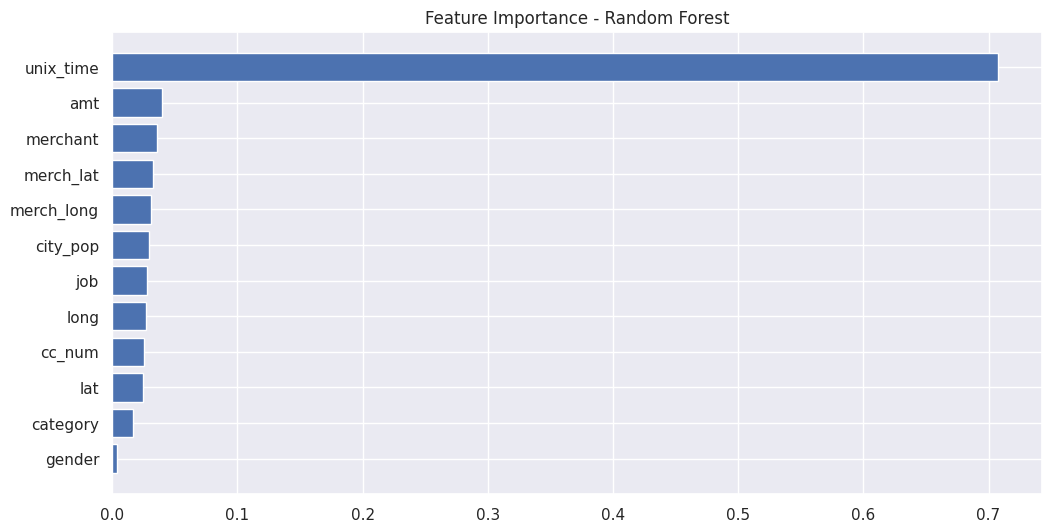

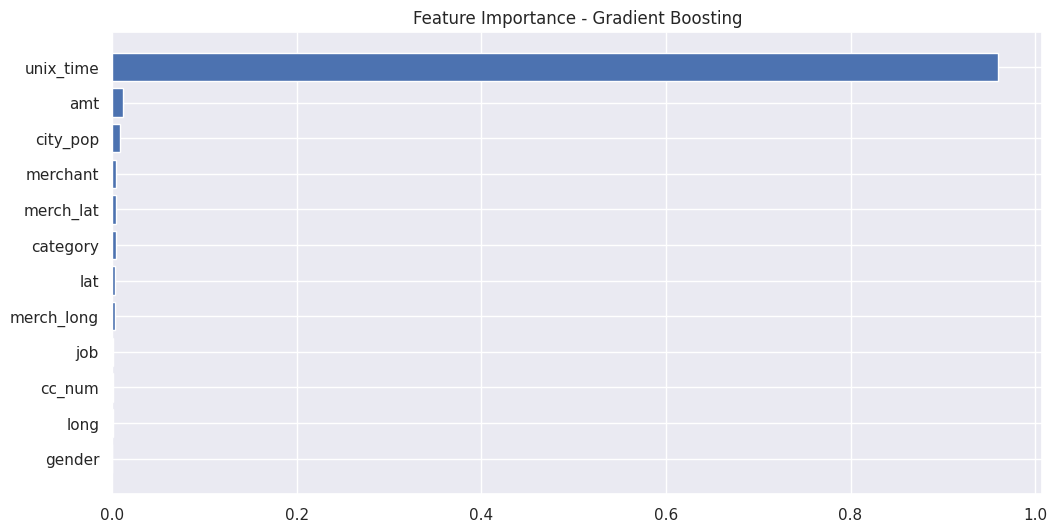

In [16]:
feature_importance_rf = best_rf.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), X.columns[sorted_idx_rf])
plt.title('Feature Importance - Random Forest')
plt.show()

feature_importance_gb = best_gb.feature_importances_
sorted_idx_gb = np.argsort(feature_importance_gb)
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center')
plt.yticks(range(len(sorted_idx_gb)), X.columns[sorted_idx_gb])
plt.title('Feature Importance - Gradient Boosting')
plt.show()


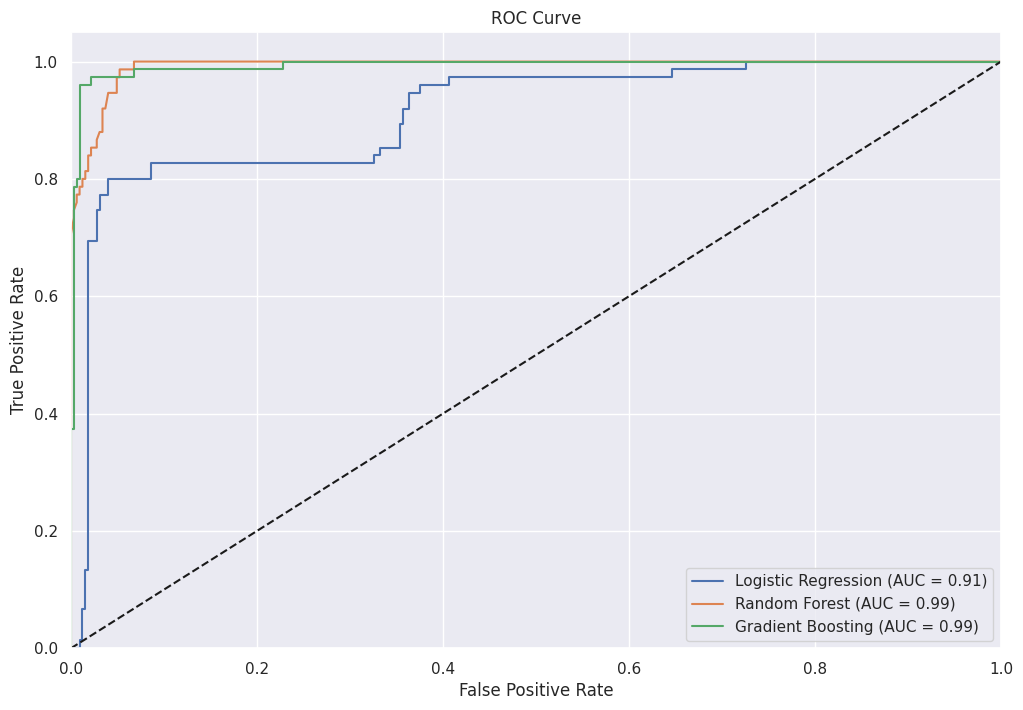

In [17]:
plt.figure(figsize=(12, 8))
for model, name in zip([log_reg, best_rf, best_gb], ['Logistic Regression', 'Random Forest', 'Gradient Boosting']):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
